### Install tensorflow and other libraries

In [3]:
import tensorflow as tf

import mitdeeplearning as mdl

import numpy as np
import matplotlib.pyplot as plt

#### 0-d tensors

In [4]:
sport = tf.constant("Tennis", tf.string)
number = tf.constant(1.41421356237,tf.float64)

print("`sport` is a {}-d Tensor".format(tf.rank(sport).numpy()))
print("`number` is a {}-d Tensor".format(tf.rank(number).numpy()))

`sport` is a 0-d Tensor
`number` is a 0-d Tensor


#### Vectors and lists can be used to create 1-d Tensors

In [5]:
sports = tf.constant(["Tennis", "Basketball"], tf.string)
numbers = tf.constant([3.141592, 1.414213, 2.71821], tf.float64)

print("`sports` is a {}-d Tensor with shape: {}".format(tf.rank(sports).numpy(), tf.shape(sports)))
print("`numbers` is a {}-d Tensor with shape: {}".format(tf.rank(numbers).numpy(), tf.shape(numbers)))

`sports` is a 1-d Tensor with shape: [2]
`numbers` is a 1-d Tensor with shape: [3]


In [6]:
#defining higher-order Tensors

'''TODO: Define a 2-d Tensor'''
matrix = tf.constant([[1,2,3], [4,5,6]], tf.float64)

assert isinstance(matrix, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(matrix).numpy() == 2

print("This is a {}-d matrix".format(tf.rank(matrix).numpy()))

This is a 2-d matrix


In [7]:
# 4-d matrix with tf.zeros

images = tf.zeros([10, 256, 256, 3], tf.float64)

assert isinstance(images, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(images).numpy() == 4, "matrix must be of rank 4"
assert tf.shape(images).numpy().tolist() == [10, 256, 256, 3], "matrix is incorrect shape"

print("This is a {}-d matrix of a {} shape".format(tf.rank(images).numpy(), tf.shape(images)))

This is a 4-d matrix of a [ 10 256 256   3] shape


In [8]:
# slicing to access subtensors

row_vector = matrix[1]
column_vector = matrix[:,1]
scalar = matrix[1,2]

print(matrix.numpy())

print("`row_vector`: {}".format(row_vector.numpy()))
print("`column_vector`: {}".format(column_vector.numpy()))
print("`scalar`: {}".format(scalar.numpy()))

[[1. 2. 3.]
 [4. 5. 6.]]
`row_vector`: [4. 5. 6.]
`column_vector`: [2. 5.]
`scalar`: 6.0


### Computations on Tensors

In [9]:
a = tf.constant(15)
b = tf.constant(61)

c1 = tf.add(a,b)
c2 = a + b

print(c1)
print(c2)

tf.Tensor(76, shape=(), dtype=int32)
tf.Tensor(76, shape=(), dtype=int32)


In [10]:
def func(a,b):
    c = tf.add(a,b)
    d = tf.subtract(b,1)
    e = tf.multiply(c,d)
    return e

a, b = 1.5, 2.5

e_out = func(a,b)
print(e_out)

tf.Tensor(6.0, shape=(), dtype=float32)


### Neural Networks in TensorFlow

In [11]:
# n_output_nodes: number of output nodes
# input_shape: shape of the input
# x: input to the layer

class OurDenseLayer(tf.keras.layers.Layer):
    def __init__(self, n_output_nodes):
        super(OurDenseLayer, self).__init__()
        self.n_output_nodes = n_output_nodes
        
    def build(self, input_shape):
        d = int(input_shape[-1])
        self.W = self.add_weight("weight", shape=[d, self.n_output_nodes])
        self.b = self.add_weight("bias", shape=[1, self.n_output_nodes])
        
    def call(self, x):
        #TODO (use tf.matmul)
        z = tf.add(tf.matmul(x, self.W), self.b)
        
        #TODO (use tf.sigmoid)
        y  = tf.sigmoid(z)
        return y
    
tf.random.set_seed(1)
layer = OurDenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.]], shape=(1,2))
y = layer.call(x_input)

print(y.numpy())
mdl.lab1.test_custom_dense_layer_output(y)

[[0.26978594 0.45750415 0.66536945]]


AttributeError: module 'mitdeeplearning' has no attribute 'lab1'

In [ ]:
# same thing with a Keras API

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

n_output_nodes = 3

model = Sequential()

dense_layer = Dense(n_output_nodes, activation='sigmoid')

model.add(dense_layer)

In [ ]:
x_input = tf.constant([[1,2.]], shape=(1,2))

#TODO feed the model and predict the ouput
model_output = model(x_input)
print(model_output.numpy())

#### Let's directly subclass the Model class

In [15]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class SubclassModel(tf.keras.Model):

    def __init__(self, n_output_nodes):
        super(SubclassModel, self).__init__()
        
        self.dense_layer = Dense(n_output_nodes, activation='sigmoid')
        
    def call(self, inputs):
        return self.dense_layer(inputs)

In [19]:
n_output_nodes = 3 

model = SubclassModel(n_output_nodes)
x_input = tf.constant([[1,2.]], shape=(1,2))

print(model.call(x_input))

tf.Tensor([[0.9139061 0.3266745 0.8392328]], shape=(1, 3), dtype=float32)


#### Another example

In [22]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class IdentityModel(tf.keras.Model):
    def __init__(self, n_output_nodes):
        super(IdentityModel, self).__init__()
        self.dense_layer = tf.keras.layers.Dense(n_output_nodes, activation='sigmoid')
        
    '''TODO: Implement the behavior where the network outputs the input, unchanged, 
      under control of the isidentity argument.'''
    
    def call(self, inputs, isidentity=False):
        x = self.dense_layer(inputs)
        
        if isidentity:
            return inputs
        return x

In [24]:
n_output_nodes = 3
model = IdentityModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))
'''TODO: pass the input into the model and call with and without the input identity option.'''
out_activate = model.call(x_input)
out_identity = model.call(x_input, isidentity=True)

print("Network output with activation: {}; network identity output: {}".format(out_activate.numpy(), out_identity.numpy()))

Network output with activation: [[0.11969811 0.4301142  0.3474862 ]]; network identity output: [[1. 2.]]


### Automatic differentation in Tensorflow

In [27]:
#gradient computation with GradientTape

x = tf.Variable(3.0)

#init the gradient tape
with tf.GradientTape() as tape:
    y = x * x
    
# access the gradient -- derivative of y with respect to x
dy_dx = tape.gradient(y, x)

assert dy_dx.numpy() == 6.0

Initializing x=[[1.2136043]]


Text(0, 0.5, 'x value')

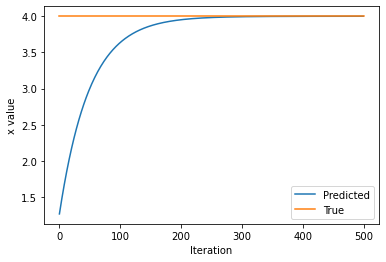

In [42]:
#function minimazation with automatic differentation and SGD 

#init a random value for our initial x
x = tf.Variable([tf.random.normal([1])])
print("Initializing x={}".format(x.numpy()))

learning_rate = 1e-2 #learning rate for SGD
history = []

#target_value
x_f = 4

#We will run SGD for a number of iterations. At each iteration, we compute the loss.
#Compute the deravitive of the loss with respect to x and perform SGD

for i in range(500):
    with tf.GradientTape() as tape:
        loss = (x - x_f) ** 2
    grad = tape.gradient(loss, x) #compute the derivative of the loss with respect to x
    new_x = x - learning_rate*grad
    x.assign(new_x)
    history.append(x.numpy()[0])
    
#plot the evaluation of x as we optimize towards x_f!

plt.plot(history)
plt.plot([0,500],[x_f,x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')